#Estadística descriptiva.

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("Datos_Resultantes.csv")
print(data)

       Latitude  Longitude  Smin    Az  Depth  ErrDepth  Nsta    Gap  \
0       28.5661   -17.8807  10.4  81.0   21.6      12.7   5.0  189.0   
1       28.5584   -17.8508  13.6  67.0   28.2      13.0   4.0  149.0   
2       28.5719   -17.8735  10.1  87.0   24.2      14.0   5.0  181.0   
3       28.5656   -17.8802  12.1  87.0   24.4      13.7   5.0  189.0   
4       28.5499   -17.8549  10.8  90.0   26.3      11.5   5.0  168.0   
...         ...        ...   ...   ...    ...       ...   ...    ...   
15557   28.6190   -17.8804   2.4  84.0    2.5       3.6   9.0  137.0   
15558   28.5525   -17.8451   7.3  80.0   13.6       7.4  10.0  113.0   
15559   28.6054   -17.9003   2.9  75.0    3.1       3.6   9.0  193.0   
15560   28.6263   -17.8845   2.3  70.0    1.1       7.0   7.0  149.0   
15561   28.5679   -17.8634   9.1  75.0   16.5      10.2   9.0  146.0   

       Magnitud  pca_retemp  
0           1.6   -0.125555  
1           2.7   -0.193603  
2           1.7   -0.139373  
3           1.7

In [ ]:
#Mostramos las primeras cinco filas
print(data.head())

   Latitude  Longitude  Smin    Az  Depth  ErrDepth  Nsta    Gap  Magnitud  \
0   28.5661   -17.8807  10.4  81.0   21.6      12.7   5.0  189.0       1.6   
1   28.5584   -17.8508  13.6  67.0   28.2      13.0   4.0  149.0       2.7   
2   28.5719   -17.8735  10.1  87.0   24.2      14.0   5.0  181.0       1.7   
3   28.5656   -17.8802  12.1  87.0   24.4      13.7   5.0  189.0       1.7   
4   28.5499   -17.8549  10.8  90.0   26.3      11.5   5.0  168.0       2.6   

   pca_retemp  
0   -0.125555  
1   -0.193603  
2   -0.139373  
3   -0.135564  
4   -0.127914  


In [ ]:
#Información general
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15562 entries, 0 to 15561
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    15562 non-null  float64
 1   Longitude   15562 non-null  float64
 2   Smin        15562 non-null  float64
 3   Az          15562 non-null  float64
 4   Depth       15562 non-null  float64
 5   ErrDepth    15562 non-null  float64
 6   Nsta        15562 non-null  float64
 7   Gap         15562 non-null  float64
 8   Magnitud    15562 non-null  float64
 9   pca_retemp  15562 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB
None


In [ ]:
#Estadísticas descriptivas generales
print(data.describe())

           Latitude     Longitude          Smin            Az         Depth  \
count  15562.000000  15562.000000  15562.000000  15562.000000  15562.000000   
mean      28.597772    -17.837592      6.463739     92.517993     13.911579   
std        0.072274      0.042316      3.689651     33.767785      9.682166   
min       28.186000    -18.115400      1.400000      0.000000      0.000000   
25%       28.558825    -17.857800      3.700000     74.000000      7.800000   
50%       28.568300    -17.835700      5.000000     82.000000     11.500000   
75%       28.609100    -17.819100      9.100000     95.000000     21.500000   
max       29.219800    -17.287200     30.900000    178.000000     91.500000   

           ErrDepth          Nsta           Gap      Magnitud    pca_retemp  
count  15562.000000  15562.000000  15562.000000  15562.000000  1.556200e+04  
mean       7.978332     10.267446    149.319046      2.043471  4.383248e-17  
std        4.453136      6.411228     60.268006      0

In [ ]:
#Valores nulos por variable
print(data.isnull().sum())

Latitude      0
Longitude     0
Smin          0
Az            0
Depth         0
ErrDepth      0
Nsta          0
Gap           0
Magnitud      0
pca_retemp    0
dtype: int64


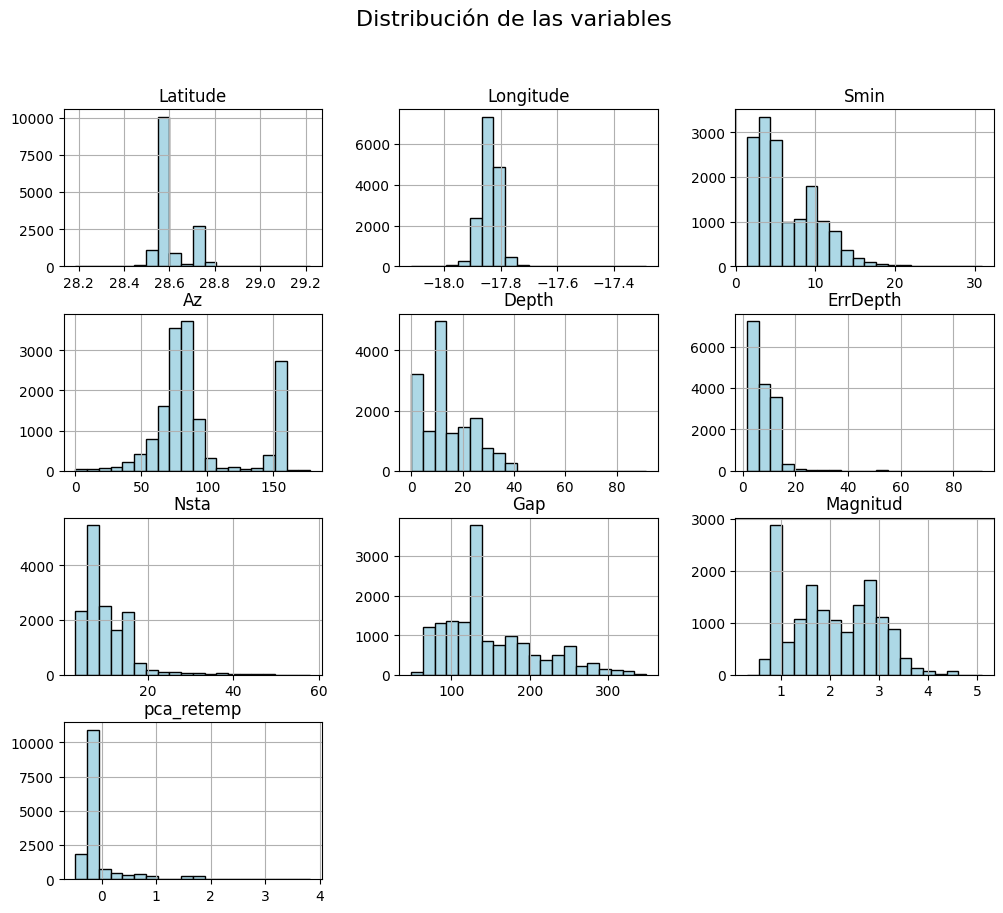

In [ ]:
# Análisis de la distribución de cada variable (histogramas)
data.hist(bins=20, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

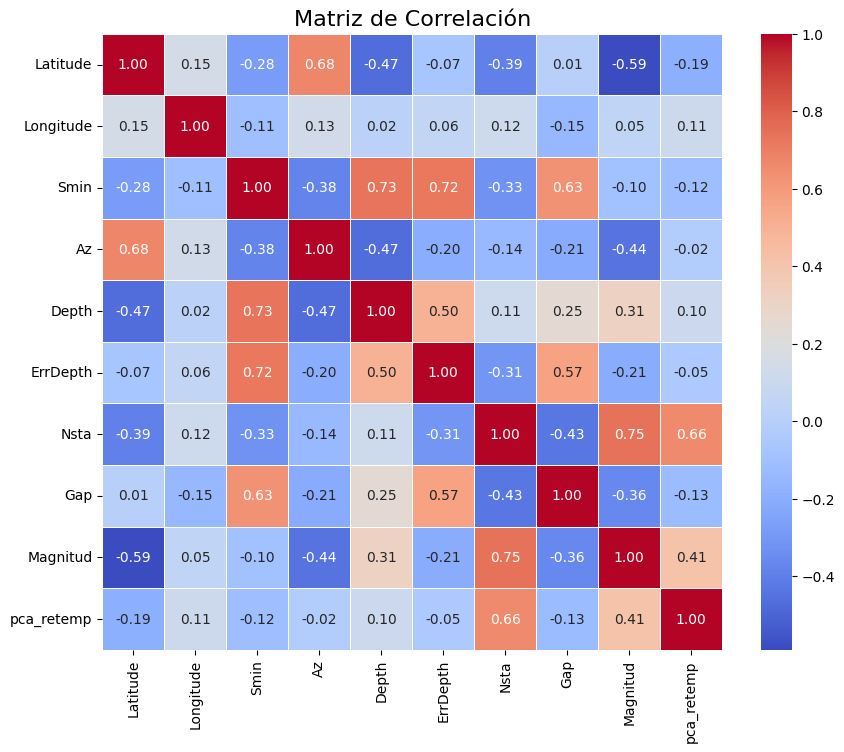

In [ ]:
# Visualización de la matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

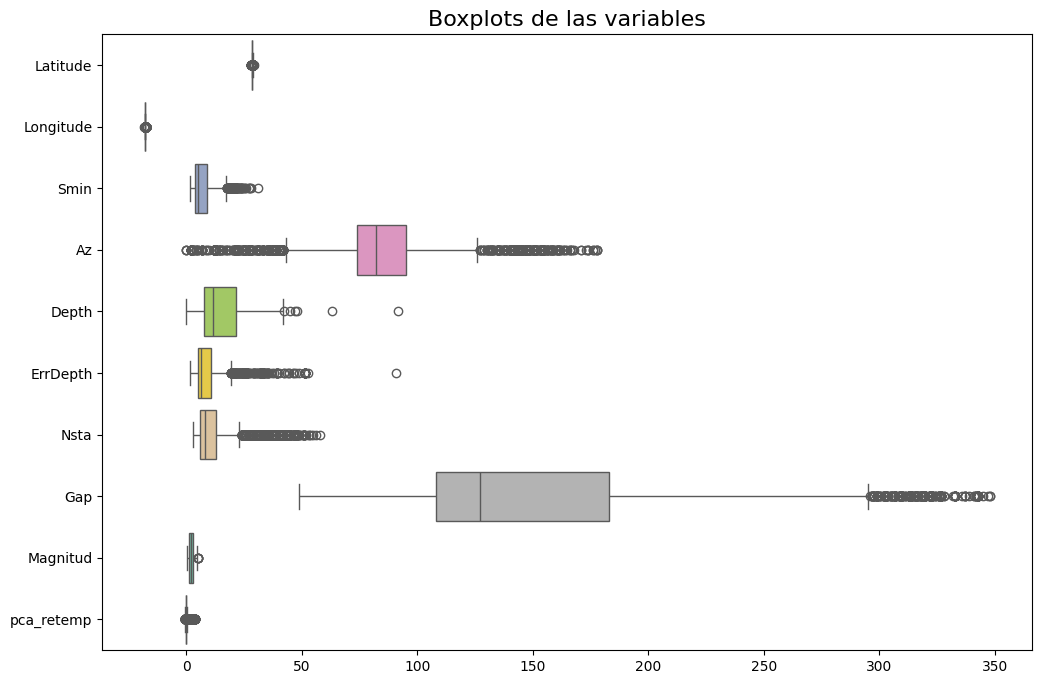

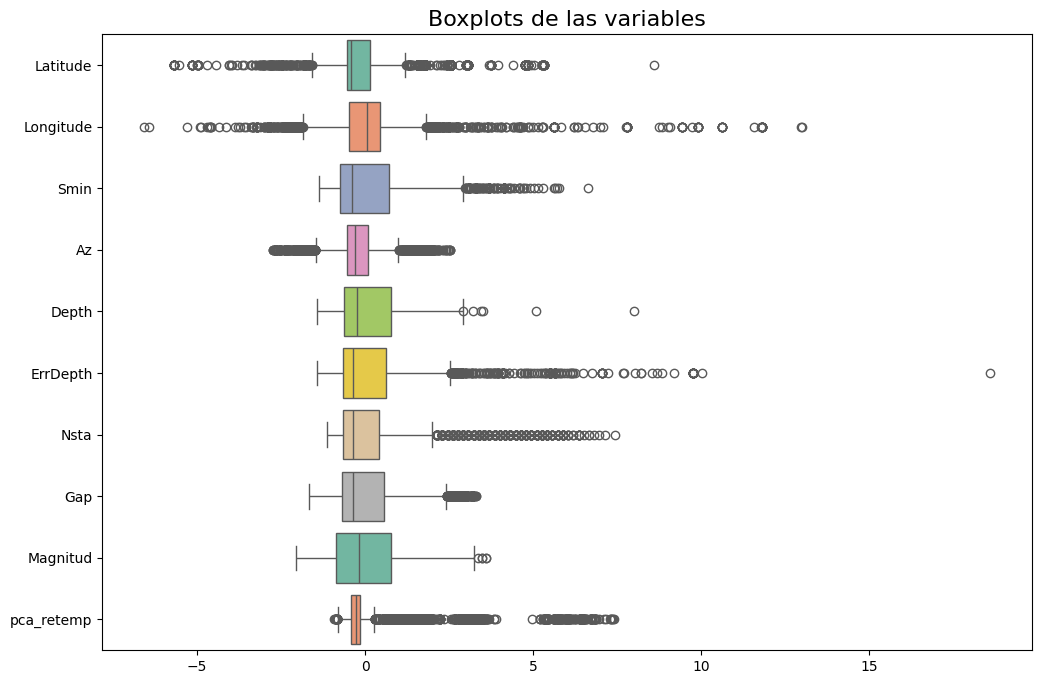

In [ ]:
# Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title("Boxplots de las variables", fontsize=16)
plt.show()
# Normalización para box plots
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized, orient='h', palette='Set2')
plt.title("Boxplots de las variables", fontsize=16)
plt.show()

In [ ]:
# Análisis de valores atípicos y dispersión
print("\nAnálisis de valores atípicos y dispersión:")
for column in data.select_dtypes(include=[np.number]).columns:
    print(f"\nAnálisis de la columna '{column}':")
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f"Valores atípicos detectados: {outliers.shape[0]} filas")
    print(f"Rango intercuartil (IQR) para {column}: {IQR}")


Análisis de valores atípicos y dispersión:

Análisis de la columna 'Latitude':
Valores atípicos detectados: 3315 filas
Rango intercuartil (IQR) para Latitude: 0.05027499999999918

Análisis de la columna 'Longitude':
Valores atípicos detectados: 582 filas
Rango intercuartil (IQR) para Longitude: 0.03870000000000218

Análisis de la columna 'Smin':
Valores atípicos detectados: 126 filas
Rango intercuartil (IQR) para Smin: 5.3999999999999995

Análisis de la columna 'Az':
Valores atípicos detectados: 3624 filas
Rango intercuartil (IQR) para Az: 21.0

Análisis de la columna 'Depth':
Valores atípicos detectados: 6 filas
Rango intercuartil (IQR) para Depth: 13.7

Análisis de la columna 'ErrDepth':
Valores atípicos detectados: 228 filas
Rango intercuartil (IQR) para ErrDepth: 5.700000000000001

Análisis de la columna 'Nsta':
Valores atípicos detectados: 595 filas
Rango intercuartil (IQR) para Nsta: 7.0

Análisis de la columna 'Gap':
Valores atípicos detectados: 347 filas
Rango intercuartil (IQ

In [ ]:
# Análisis de distribuciones de variables categóricas (si existen)
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nDistribución de las variables categóricas:")
    for column in categorical_columns:
        print(f"\nDistribución de {column}:")
        print(data[column].value_counts())
        sns.countplot(x=column, data=data, palette='Set1')
        plt.title(f"Distribución de la variable {column}", fontsize=16)
        plt.xticks(rotation=45)
        plt.show()
else:
    print("\nNo se encontraron variables categóricas.")


No se encontraron variables categóricas.
